In [38]:
import xml.etree.ElementTree as ET
import glob
from collections import Counter
import matplotlib.pyplot as plt
import os
import cv2

## Extend datasets using Faces dataset

Retrieve all files in the validation folder to check how many files are needed to get 3000 faces worth of data to stabilise the global dataset

In [8]:
files = glob.glob('./Datasets/Faces/labels/val/*')
# files = [os.path.basename(file) for file in files]

def count_rows_in_file(file_path):
    with open(file_path, 'r') as file:
        return len(file.readlines())

In [9]:
total_rows = 0
file_count = 0

for file in files:
    rows = count_rows_in_file(file)
    total_rows += rows
    file_count += 1
    if total_rows >= 3000:
        break

print(f"It will take {file_count} files to reach {total_rows} total rows.")

It will take 998 files to reach 3000 total rows.


Save the first 998 files

In [15]:
faces_files = []

for i in range(998):
    faces_files.append(files[i])
    
for file in faces_files:
    print(file)
    

./Datasets/Faces/labels/val\0003d5dfa8f0dd41.txt
./Datasets/Faces/labels/val\0007ad5c6245a41d.txt
./Datasets/Faces/labels/val\000cc0cd61c6c8d7.txt
./Datasets/Faces/labels/val\001ea8a8ca78a3bc.txt
./Datasets/Faces/labels/val\00430ce61009c131.txt
./Datasets/Faces/labels/val\0046c490ad699ce9.txt
./Datasets/Faces/labels/val\004a688b02428848.txt
./Datasets/Faces/labels/val\005feff8c814fb4c.txt
./Datasets/Faces/labels/val\006f325ad71643a2.txt
./Datasets/Faces/labels/val\00790ccfad100384.txt
./Datasets/Faces/labels/val\007e2d0680208072.txt
./Datasets/Faces/labels/val\0081d67c4cfc9134.txt
./Datasets/Faces/labels/val\00824274fbef9c93.txt
./Datasets/Faces/labels/val\0084d707a9cca12b.txt
./Datasets/Faces/labels/val\008bf03851527e74.txt
./Datasets/Faces/labels/val\0097fb7387049d8b.txt
./Datasets/Faces/labels/val\0098312a40cabb46.txt
./Datasets/Faces/labels/val\00b242e2ccf93adc.txt
./Datasets/Faces/labels/val\00d5b7d68d52ac56.txt
./Datasets/Faces/labels/val\00e64d002478816c.txt
./Datasets/Faces/lab

In [16]:
for file in files:
    if file not in faces_files:
        os.remove(file)

Now to do the same with the respective images of the saved labels

In [32]:
image_files = glob.glob('./Datasets/Faces/images/val/*')
image_filenames = [os.path.basename(file) for file in image_files]
image_base_filenames = []
for file in image_filenames:
    image_base_filenames.append(file.split('.')[0])

to_keep_filenames = [os.path.basename(file) for file in faces_files]
to_keep_base_filenames = []
for file in to_keep_filenames:
    to_keep_base_filenames.append(file.split('.')[0])

In [34]:
# for file in to_keep_base_filenames:
#     print(file)

for file in image_base_filenames:
    if file not in to_keep_base_filenames:
        os.remove(f'./Datasets/Faces/images/val/{file}.jpg')

#### Transforming YOLO labels to Pascal VOC format

In [41]:
def yolo_to_pascal_voc(yolo_file, image_width, image_height, output_dir):
    with open(yolo_file, 'r') as f:
        lines = f.readlines()

    # Extract filename without extension
    base_filename = os.path.splitext(os.path.basename(yolo_file))[0]
    xml_file = os.path.join(output_dir, f"{base_filename}.xml")

    # Create XML structure
    annotation = ET.Element("annotation")
    folder = ET.SubElement(annotation, "folder").text = "images"
    filename = ET.SubElement(annotation, "filename").text = f"{base_filename}.jpg"

    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(image_width)
    ET.SubElement(size, "height").text = str(image_height)
    ET.SubElement(size, "depth").text = "3"

    ET.SubElement(annotation, "segmented").text = "0"

    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.split())

        # Convert YOLO coordinates to PASCAL VOC
        xmin = int((x_center - width / 2) * image_width)
        ymin = int((y_center - height / 2) * image_height)
        xmax = int((x_center + width / 2) * image_width)
        ymax = int((y_center + height / 2) * image_height)

        # Add object to XML
        obj = ET.SubElement(annotation, "object")
        ET.SubElement(obj, "name").text = str("without_mask")
        ET.SubElement(obj, "pose").text = "Unspecified"
        ET.SubElement(obj, "truncated").text = "0"
        ET.SubElement(obj, "difficult").text = "0"

        bndbox = ET.SubElement(obj, "bndbox")
        ET.SubElement(bndbox, "xmin").text = str(xmin)
        ET.SubElement(bndbox, "ymin").text = str(ymin)
        ET.SubElement(bndbox, "xmax").text = str(xmax)
        ET.SubElement(bndbox, "ymax").text = str(ymax)

    # Write XML to file
    tree = ET.ElementTree(annotation)
    tree.write(xml_file, encoding="utf-8", xml_declaration=True)

    print(f"Converted {yolo_file} to {xml_file}")

In [42]:
yolo_images = glob.glob('./Datasets/Faces/images/val/*')
# yolo_labels = glob.glob('./Datasets/Faces/labels/val/*')

for image in yolo_images:
    filename = os.path.basename(image).split('.')[0]
    img = cv2.imread(image)
    height, width, _ = img.shape
    yolo_label = f'./Datasets/Faces/labels/val/{filename}.txt'
    # print(f"Image: {image}")
    # print(f"Height: {height}")
    # print(f"Width: {width}")
    # print(f"Label: {yolo_label}")
    yolo_to_pascal_voc(yolo_label, width, height, './Datasets/NewPascalFormat/')

Converted ./Datasets/Faces/labels/val/0003d5dfa8f0dd41.txt to ./Datasets/NewPascalFormat/0003d5dfa8f0dd41.xml
Converted ./Datasets/Faces/labels/val/0007ad5c6245a41d.txt to ./Datasets/NewPascalFormat/0007ad5c6245a41d.xml
Converted ./Datasets/Faces/labels/val/000cc0cd61c6c8d7.txt to ./Datasets/NewPascalFormat/000cc0cd61c6c8d7.xml
Converted ./Datasets/Faces/labels/val/001ea8a8ca78a3bc.txt to ./Datasets/NewPascalFormat/001ea8a8ca78a3bc.xml
Converted ./Datasets/Faces/labels/val/00430ce61009c131.txt to ./Datasets/NewPascalFormat/00430ce61009c131.xml
Converted ./Datasets/Faces/labels/val/0046c490ad699ce9.txt to ./Datasets/NewPascalFormat/0046c490ad699ce9.xml
Converted ./Datasets/Faces/labels/val/004a688b02428848.txt to ./Datasets/NewPascalFormat/004a688b02428848.xml
Converted ./Datasets/Faces/labels/val/005feff8c814fb4c.txt to ./Datasets/NewPascalFormat/005feff8c814fb4c.xml
Converted ./Datasets/Faces/labels/val/006f325ad71643a2.txt to ./Datasets/NewPascalFormat/006f325ad71643a2.xml
Converted 

#### Transforming Pascal VOC to YOLO Labels

In [43]:
class_mapping = {
    "without_mask": 0,
    "with_mask": 1,
    "mask_weared_incorrect": 2
}

def pascal_voc_to_yolo(voc_file, output_dir):
    tree = ET.parse(voc_file)
    root = tree.getroot()

    image_width = int(root.find("size/width").text)
    image_height = int(root.find("size/height").text)

    # Create YOLO file
    base_filename = os.path.splitext(os.path.basename(voc_file))[0]
    yolo_file = os.path.join(output_dir, f"{base_filename}.txt")

    with open(yolo_file, "w") as yolo_f:
        for obj in root.findall("object"):
            class_name = obj.find("name").text

            class_id = class_mapping[class_name]

            # Get bounding box coordinates
            bndbox = obj.find("bndbox")
            xmin = int(bndbox.find("xmin").text)
            ymin = int(bndbox.find("ymin").text)
            xmax = int(bndbox.find("xmax").text)
            ymax = int(bndbox.find("ymax").text)

            # Convert to YOLO format
            x_center = ((xmin + xmax) / 2) / image_width
            y_center = ((ymin + ymax) / 2) / image_height
            width = (xmax - xmin) / image_width
            height = (ymax - ymin) / image_height

            # Write
            yolo_f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

    print(f"Converted {voc_file} to {yolo_file}")

In [44]:
xml_files = glob.glob('./Datasets/annotations/*')

for file in xml_files:
    pascal_voc_to_yolo(file, './Datasets/NewYoloFormat/')

Converted ./Datasets/annotations\maksssksksss0.xml to ./Datasets/NewYoloFormat/maksssksksss0.txt
Converted ./Datasets/annotations\maksssksksss1.xml to ./Datasets/NewYoloFormat/maksssksksss1.txt
Converted ./Datasets/annotations\maksssksksss10.xml to ./Datasets/NewYoloFormat/maksssksksss10.txt
Converted ./Datasets/annotations\maksssksksss100.xml to ./Datasets/NewYoloFormat/maksssksksss100.txt
Converted ./Datasets/annotations\maksssksksss101.xml to ./Datasets/NewYoloFormat/maksssksksss101.txt
Converted ./Datasets/annotations\maksssksksss102.xml to ./Datasets/NewYoloFormat/maksssksksss102.txt
Converted ./Datasets/annotations\maksssksksss103.xml to ./Datasets/NewYoloFormat/maksssksksss103.txt
Converted ./Datasets/annotations\maksssksksss104.xml to ./Datasets/NewYoloFormat/maksssksksss104.txt
Converted ./Datasets/annotations\maksssksksss105.xml to ./Datasets/NewYoloFormat/maksssksksss105.txt
Converted ./Datasets/annotations\maksssksksss106.xml to ./Datasets/NewYoloFormat/maksssksksss106.txt


#### K-Fold split

In [55]:
import os
import shutil
from sklearn.model_selection import KFold
import yaml

Initialise directories:
1. images
2. labels
3. output (for kfold)

In [50]:
images_dir = './Datasets/Data/'
labels_dir = './Datasets/Labels/Yolo/'
output_dir = './Datasets/kfold/'
os.makedirs(output_dir, exist_ok=True)

In [53]:
image_files = glob.glob('./Datasets/Data/*')
image_files = [os.path.basename(file) for file in image_files]


image_types = ['.jpg','.png']

# kFold
kf = KFold(n_splits=5, shuffle=True, random_state=21)

In [54]:
for fold, (train_idx, val_idx) in enumerate(kf.split(image_files), start=1):
    fold_dir = os.path.join(output_dir, f'fold_{fold}')
    train_images_dir = os.path.join(fold_dir, 'train/images')
    train_labels_dir = os.path.join(fold_dir, 'train/labels')
    val_images_dir = os.path.join(fold_dir, 'val/images')
    val_labels_dir = os.path.join(fold_dir, 'val/labels')
    
    os.makedirs(train_images_dir, exist_ok=True)
    os.makedirs(train_labels_dir, exist_ok=True)
    os.makedirs(val_images_dir, exist_ok=True)
    os.makedirs(val_labels_dir, exist_ok=True)

    # Train
    for i in train_idx:
        shutil.copy(os.path.join(images_dir, image_files[i]), os.path.join(train_images_dir, image_files[i]))
        label_file = os.path.splitext(image_files[i])[0] + '.txt'
        shutil.copy(os.path.join(labels_dir, label_file), os.path.join(train_labels_dir, label_file))
    
    # Val
    for i in val_idx:
        shutil.copy(os.path.join(images_dir, image_files[i]), os.path.join(val_images_dir, image_files[i]))
        label_file = os.path.splitext(image_files[i])[0] + '.txt'
        shutil.copy(os.path.join(labels_dir, label_file), os.path.join(val_labels_dir, label_file))

print("Dataset split into K folds successfully.")

Dataset split into K folds successfully.


Add Yaml files for each fold

In [56]:
for fold in range(1, 6):
    yaml_data = {
        'path': f'./Datasets/kfold/fold_{fold}',
        'train': 'train',
        'val': 'val',
        'names': ['without_mask', 'with_mask', 'mask_weared_incorrect']
    }

    with open(f'./Datasets/kfold/fold_{fold}/data.yaml', 'w') as yaml_file:
        yaml.dump(yaml_data, yaml_file)

K-fold split for Faster R-CNN

In [10]:
from torchvision.datasets import VOCDetection
import torchvision.transforms as T

import os
import torch
import xml.etree.ElementTree as ET
from torch.utils.data import Dataset
from PIL import Image

In [26]:
class PascalDataset(Dataset):
    def __init__(self, root, transforms=None):
        self.root = root
        self.transforms = transforms

        self.img_dir = os.path.join(root, "Data") # images
        self.ann_dir = os.path.join(root, "Labels", "Pascal") # pascal labels

        self.imgs = sorted(f for f in os.listdir(self.img_dir) if f.endswith(('.jpg', '.png')))
        self.anns = sorted(f for f in os.listdir(self.ann_dir) if f.endswith('.xml'))

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.imgs[idx])
        img = Image.open(img_path).convert("RGB")

        ann_path = os.path.join(self.ann_dir, self.anns[idx])
        boxes, labels = self.parse_pascal_voc(ann_path)

        # to pytorch tensors
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        image_id = torch.tensor([idx])
        area = (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1])
        iscrowd = torch.zeros((len(boxes),), dtype=torch.int64)

        # target directories
        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": image_id,
            "area": area,
            "iscrowd": iscrowd,
        }
        
        if self.transforms:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.imgs)

    def parse_pascal_voc(self, xml_path):
        # parse pascal labels
        tree = ET.parse(xml_path)
        root = tree.getroot()

        boxes = []
        labels = []
        label_mapping = {
            "without_mask": 1,
            "with_mask": 2,
            "mask_weared_incorrect": 3,
        }

        for obj in root.findall("object"):
            name = obj.find("name").text
            label = label_mapping[name]

            bndbox = obj.find("bndbox")
            xmin = float(bndbox.find("xmin").text)
            ymin = float(bndbox.find("ymin").text)
            xmax = float(bndbox.find("xmax").text)
            ymax = float(bndbox.find("ymax").text)

            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(label)

        return boxes, labels

In [27]:
dataset = PascalDataset('./Datasets')

In [32]:
img, target = dataset[0]

print("Image size:", img.size)
print("Boxes:", target["boxes"])
print("Labels:", target["labels"])

Image size: (1024, 576)
Boxes: tensor([[152.,  52., 251., 125.],
        [376., 132., 515., 297.],
        [719.,  77., 817., 182.]])
Labels: tensor([1, 1, 1])


Validate dataset data

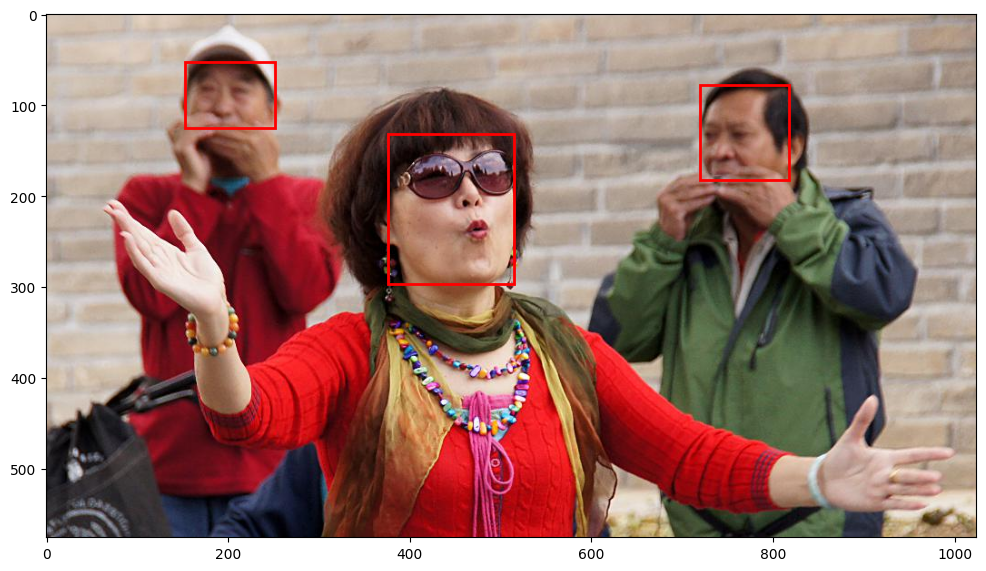

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def visualize_image_with_boxes(image, boxes):
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)

    for box in boxes:
        xmin, ymin, xmax, ymax = box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()

img, target = dataset[0]
boxes = target["boxes"].numpy()

visualize_image_with_boxes(img, boxes)


K-fold splitting for the Pascal Voc Dataset with k set to 5

In [30]:
from sklearn.model_selection import KFold
from torch.utils.data import Subset, DataLoader


In [31]:
data_dir = "./Datasets/Data"
labels_dir = "./Datasets/Labels/Pascal"
splits_dir = "./Datasets/Splits"

os.makedirs(splits_dir, exist_ok=True)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(range(len(dataset))), 1):
    fold_dir = os.path.join(splits_dir, f"Fold_{fold}")
    train_dir = os.path.join(fold_dir, "Train")
    val_dir = os.path.join(fold_dir, "Val")

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    for idx in train_idx:
        img_name = dataset.imgs[idx]
        ann_name = dataset.anns[idx]

        os.link(os.path.join(data_dir, img_name), os.path.join(train_dir, img_name))
        os.link(os.path.join(labels_dir, ann_name), os.path.join(train_dir, ann_name))

    for idx in val_idx:
        img_name = dataset.imgs[idx]
        ann_name = dataset.anns[idx]

        os.link(os.path.join(data_dir, img_name), os.path.join(val_dir, img_name))
        os.link(os.path.join(labels_dir, ann_name), os.path.join(val_dir, ann_name))

    print(f"Saved Fold {fold} to {fold_dir}")

Saved Fold 1 to ./Datasets/Splits\Fold_1
Saved Fold 2 to ./Datasets/Splits\Fold_2
Saved Fold 3 to ./Datasets/Splits\Fold_3
Saved Fold 4 to ./Datasets/Splits\Fold_4
Saved Fold 5 to ./Datasets/Splits\Fold_5
